In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

## Problem 1.

The following functions compute and return the covariance and the correlation coefficient.

In [2]:
def sample_covariance(x, y):
    return np.cov(x,y,ddof=1)[0,1]

In [3]:
def correlation_coeff(x, y):
    return stats.pearsonr(x,y)[0]

Use these functions to answer the following questions:

In [4]:
x = np.array([97,86,89,84,94,74])
y = np.array([14,11,9,9,15,7])

#### 1. 
What happens to $r$ if you double each of the values in your data.  How does this compare to what happens to the covariance?

In [5]:
doublex = x*2
doubley = y*2
cov1 = sample_covariance(x,y)
cor1 = correlation_coeff(x,y)
cov2 = sample_covariance(doublex,doubley)
cor2 = correlation_coeff(doublex,doubley)
print("cov1 =", cov1)
print("cor1 =", cor1)
print('cov2 =', cov2)
print('cor2 =', cor2)

cov1 = 22.46666666666667
cor1 = 0.8831162909634475
cov2 = 89.86666666666667
cor2 = 0.8831162909634475


The correlation coefficient doesn't change.

The covariance becomes 4 times of the original value.

#### 2. 
What happens to $r$ if you add 100 to each value in your data set.  How does this compare to what happens to the covariance?

In [6]:
addx = x+100
addy = y+100
cov3 = sample_covariance(x,y)
cor3 = correlation_coeff(x,y)
cov4 = sample_covariance(addx,addy)
cor4 = correlation_coeff(addx,addy)
print('cov3 =', cov3)
print('cor3 =', cor3)
print('cov4 =', cov4)
print('cor4 =', cor4)

cov3 = 22.46666666666667
cor3 = 0.8831162909634475
cov4 = 22.46666666666667
cor4 = 0.8831162909634473


The correlation coefficient doesn't change.

The covariance also doesn't change.

## Problem 2.

Does skill in one sport imply skill in a related sport?  The answer might be different for different activities.  Let us find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) and the vertical jump. 

`triple_vertical` has data for 40 collegiate level soccer players.  Each athlete's distance in both jump activities was measured in centimeters. We are looking specifically for a *linear* association between skill in the two sports. 

In [7]:
jumps = Table.read_table('triple_vertical.csv')
jumps

triple,vertical
383,33
781,71.1
561.62,62.25
624.52,61.33
446.24,40.19
515.3,38.96
449.22,39.69
560.91,46.51
519.12,37.68
595.38,53.48


#### 1. 
Draw the scatter plot of both distances with triple jump on the horizontal axis. Comment on the strength of the relationship.

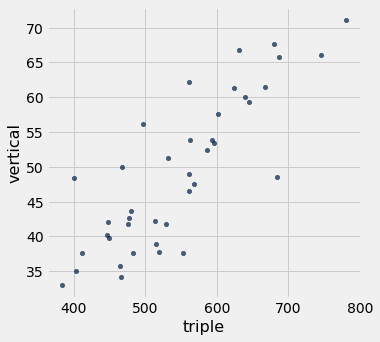

In [8]:
jumps.scatter('triple','vertical')

The scatter plot shows us a positive linear association: triple with larger distance imply larger distance on vertical.

#### 2.
Calculate the correlation coefficient **without** using any built-in function (e.g. numpy.cov, stats.pearsonr).

In [9]:
vertical_mean = np.mean(jumps.column('vertical'))
triple_mean = np.mean(jumps.column('triple'))
vertical_std = np.std(jumps.column('vertical'), ddof=1)
triple_std = np.std(jumps.column('triple'), ddof=1)
n = jumps.num_rows
covariance = np.sum((jumps.column('vertical')-vertical_mean)*
                    (jumps.column('triple')-triple_mean))/(n-1)
normalizer = vertical_std*triple_std
r = covariance/normalizer
print('r=',round(r,6))

r= 0.834308


#### 3. 
Fit a linear regression model using triple jump distance to predict vertical jump distance. Print the summary table and plot the fitted line.


y = 0.09 x + -1.57


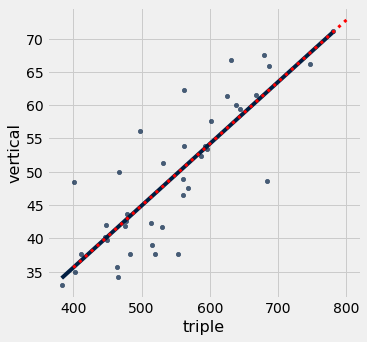

In [10]:
jumps.scatter('triple','vertical',fit_line=True)
slope = r*vertical_std/triple_std  
intercept = vertical_mean - slope * triple_mean

xs = np.linspace(400,800,100)
_ = plots.plot(xs, slope*xs+intercept, color='r', lw=3, linestyle=":")

print('y = %.2f x + %.2f'%(slope, intercept))

In [11]:
jumps_df = jumps.to_df()
result = smf.ols(formula="vertical ~ triple", data=jumps_df).fit()

print(result.params)
result.summary()

Intercept   -1.566521
triple       0.092957
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               vertical   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     87.03
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           2.27e-11
Time:                        18:13:40   Log-Likelihood:                -127.64
No. Observations:                  40   AIC:                             259.3
Df Residuals:                      38   BIC:                             262.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5665      5.535     -0.283      0.779     -12.772       9.639
triple         0.0930      0.010      9.329      0.000       0.073       0.113
==============================================================================
Omnibus:                        0.425   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.809   Jarque-Bera (JB):                0.047
Skew:                           0.061   Prob(JB):                        0.977
Kurtosis:                       3.115   Cond. No.                     3.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 4. 
Use the fitted model to predict what certain athletes' vertical jump heights would be given their triple jump distances. The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What's our prediction for what Edwards' vertical jump would be?

In [12]:
vertical_predict = slope*1829 + intercept
print('vertical_predict =', vertical_predict, 'centimeters')

vertical_predict = 168.45234708280432 centimeters


#### 5. 
What are the SSE, SST, and SSR of our model? 

Calculate the coefficient of determination ($R^2$) and the adjusted $R^2$ using these values and check it with the value given in the summary table.

In [13]:
jumps1 = jumps.with_columns(
        'Fitted Value', result.predict(),
        'Residual', jumps.column('vertical') - result.predict())
jumps1

triple,vertical,Fitted Value,Residual
383,33,34.0361,-1.03612
781,71.1,71.0331,0.066884
561.62,62.25,50.6401,11.6099
624.52,61.33,56.4872,4.84284
446.24,40.19,39.9147,0.275264
515.3,38.96,46.3344,-7.37437
449.22,39.69,40.1917,-0.501749
560.91,46.51,50.5741,-4.06415
519.12,37.68,46.6895,-9.00946
595.38,53.48,53.7784,-0.298385


In [14]:
SSE = np.sum(jumps1.column('Residual')**2)
SSE 

1384.5104685768981

In [15]:
SST = np.sum((jumps1.column('vertical')-np.mean(jumps1.column('vertical')))**2)
SST

4555.3496975

In [16]:
SSR = SST - SSE
SSR

3170.8392289231015

In [17]:
R2 = 1-SSE/SST
R2

0.6960693337469295

In [18]:
n = 40
k = 1   
adjR2 = 1-(1-R2)*(n-1)/(n-k-1)
adjR2

0.6880711583192171

#### 6. 
Using SSE, SST, and/or SSR computed above, calculate the F value for the overall fit and the p-value associated with the overall fit. 

Compare these with the values given in the summary table. Does the fit appear to be statistically significant? 


In [19]:
p = 2
n = 40
F = SSR/(p-1)/(SSE/(n-p))
F

87.0285154455555

In [20]:
stats.f.sf(F, p-1, n-p)

2.2696388580189754e-11

These values are the same with the values given in the summary table. The fit appear to be statistically significant.

## Problem 3.

Farmer Heinz is concerned about how the quantity of fertilizer (in pounds per plot) might affect the yield of tomatoes (in bushels per plot). The data are contained in the comma delimited text file `tomato.txt`.

In [21]:
tomato = Table.read_table('tomato.csv')
tomato = tomato.sort('fertilizer')
tomato.show()

plot,Yield,fertilizer
2,18,5
7,20,6
11,21,8
9,25,11
1,24,12
10,27,13
6,30,14
3,31,15
4,33,17
12,29,18


#### 1. 
Provide a scatter plot of tomato yield against the quantity of fertilizer used. Does the relationship appear to be linear?

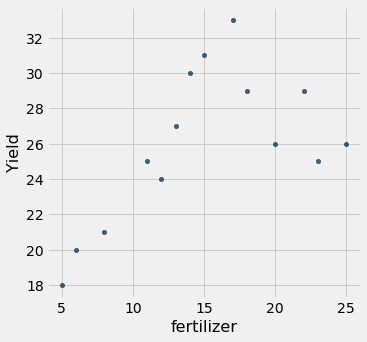

In [22]:
tomato.scatter('fertilizer','Yield')

The relationship appears to be non-linear.

#### 2. 
Conduct a series of regressions on these data with increasingly more complex models. Start with the null model of no relationship (formula='Yield~1'). Then proceed to a linear model, and then a model of order 2, and finally a model of order 3. 

(1). Plot all four fitted lines in a single plot.

(2). State which model you believe is the best and provide a statistically reasonable justification for your choice.

In [23]:
tomato_df = tomato.to_df()
result1 = smf.ols(formula="Yield ~ 1", data=tomato_df).fit()

print(result1.params)

Intercept    26.0
dtype: float64


In [24]:
result2 = smf.ols(formula="Yield ~ fertilizer", 
                 data=tomato.to_df()).fit()
print(result2.params)

Intercept     19.893331
fertilizer     0.409059
dtype: float64


In [25]:
result3 = smf.ols(formula="Yield ~ fertilizer + I(fertilizer**2)", 
                 data=tomato.to_df()).fit()
print(result3.params)

Intercept             5.703112
fertilizer            2.692343
I(fertilizer ** 2)   -0.076713
dtype: float64


In [26]:
result4 = smf.ols(formula="Yield ~ fertilizer + I(fertilizer**2) + I(fertilizer**3)", 
                 data=tomato.to_df()).fit()
print(result4.params)

Intercept             9.999913
fertilizer            1.542884
I(fertilizer ** 2)    0.010310
I(fertilizer ** 3)   -0.001958
dtype: float64


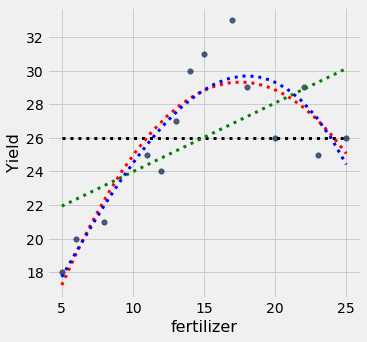

In [27]:
tomato.scatter('fertilizer','Yield',s=30)

xs = np.linspace(5,25,20)
y26 = 26*np.ones(len(xs))
xs2 = np.power(xs,2)
xs3 = np.power(xs,3)
_ = plots.plot(xs, y26, color='k', lw=3, linestyle=":")
_ = plots.plot(xs, 0.409059*xs+19.893331, color='g', lw=3, linestyle=":")
_ = plots.plot(xs, -0.076713*xs2 + 2.692343*xs + 5.703112, color='r', lw=3, linestyle=":")
_ = plots.plot(xs, -0.001958*xs3 + 0.0103103*xs2 + 1.542884*xs + 9.999913, color='b', lw=3, linestyle=":")

In [29]:
anova_lm(result3,result4)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,11.0,49.432849,0.0,NaN,NaN,NaN
1,10.0,47.776599,1.0,1.656249,0.346665,0.569067


This is a hypothesis on two models. The null hypothesis is that models of order 2 and order 3 fit the data equally well. Since here the p-value is more than 0.05, we cannot reject the null hypothesis. That is, the quadratic model and the cubic model fits the data equally well. 

In this case, we prefer the parsimonious model (model of order 2), i.e., the model with fewer parameters.